Simulate a Wiener Process (Standard Brownian Motion)

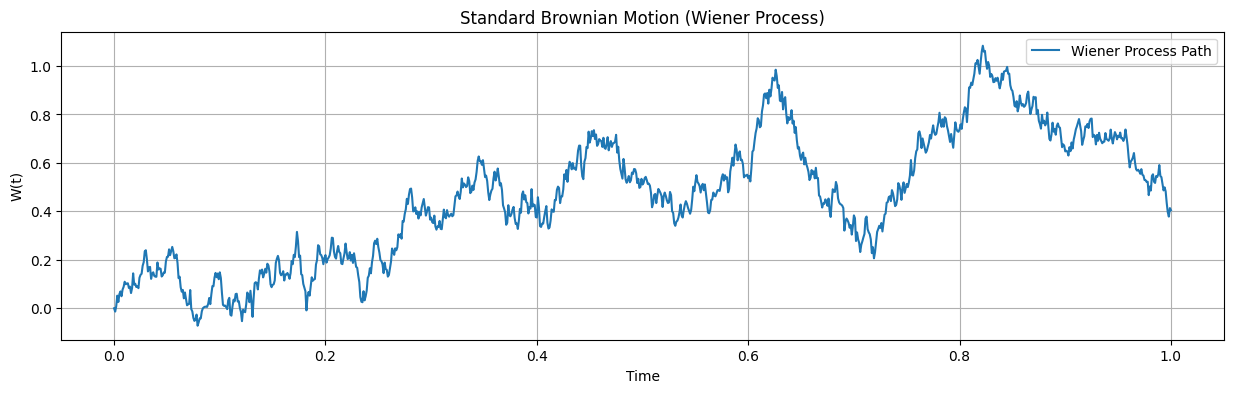

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0           # Total time
N = 1000          # Total Number of Steps
dt = T / N
t = np.linspace(0, T, N+1)
W = np.zeros(N+1)
W[1:] = np.cumsum(np.sqrt(dt) * np.random.randn(N))

plt.figure(figsize=(15, 4))
plt.plot(t, W, label="Wiener Process Path")
plt.title("Standard Brownian Motion (Wiener Process)")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()

Simulate 5 paths of Geometric Brownian Motion

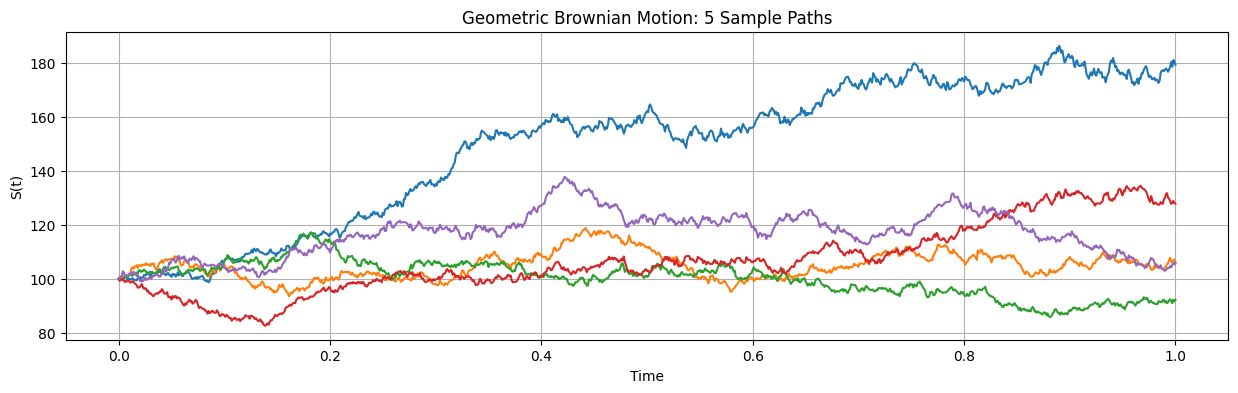

In [6]:
alpha = 0.1
sigma = 0.2
S0 = 100
num_paths = 5

plt.figure(figsize=(15, 4))
for _ in range(num_paths):
    W = np.zeros(N+1)
    W[1:] = np.cumsum(np.sqrt(dt) * np.random.randn(N))
    exponent = sigma * W + (alpha - 0.5 * sigma**2) * t
    S = S0 * np.exp(exponent)
    plt.plot(t, S)

plt.title("Geometric Brownian Motion: 5 Sample Paths")
plt.xlabel("Time")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()


Show
𝐸
[
𝑊_𝑠*𝑊_𝑡
]
=
min
⁡
(
𝑠
,
𝑡
)


In [12]:
M = 100000
s = 0.5
t_val = 0.8
# Min of s and t here is 0.5! Answer should be hence 0.5
W_s = np.random.normal(0, np.sqrt(s), M)
W_t = np.random.normal(0, np.sqrt(t_val), M)
E_WsWt = np.mean(W_s * W_t)

print(f"E[W_s * W_t] ≈ {E_WsWt:.4f}, Expected = {min(s, t_val)}")


E[W_s * W_t] ≈ 0.0031, Expected = 0.5


Show Wt−Ws is normally *distributed*

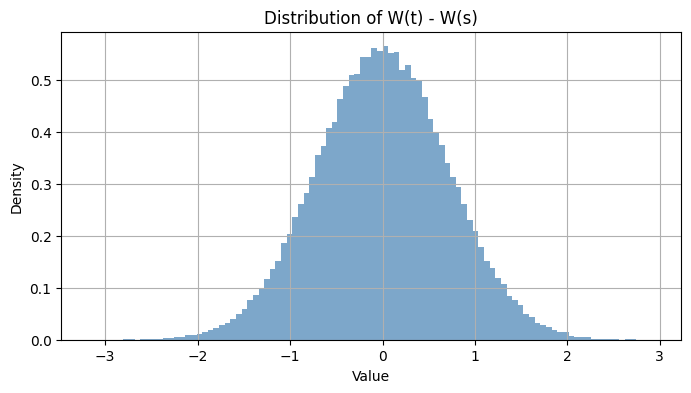

Sample mean: 0.0013, variance: 0.5047, expected variance: 0.5


In [13]:
s = 0.4
t_val = 0.9
M = 100000
Wt_minus_Ws = np.random.normal(0, np.sqrt(t_val - s), M)

plt.figure(figsize=(8, 4))
plt.hist(Wt_minus_Ws, bins=100, density=True, alpha=0.7, color='steelblue')
plt.title("Distribution of W(t) - W(s)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

print(f"Sample mean: {np.mean(Wt_minus_Ws):.4f}, variance: {np.var(Wt_minus_Ws):.4f}, expected variance: {t_val - s}")


To Show E[W_t | F_s] = W_s

In [19]:
s = 0.5
t_val = 0.9
M = 100000
Ws = np.random.normal(0, np.sqrt(s), M)
Wt_given_Ws = Ws + np.random.normal(0, np.sqrt(t_val - s), M)

# Conditional expectation
print(f"E[W_t | F_s] ≈ {np.mean(Wt_given_Ws):.4f}, E[W_s] ≈ {np.mean(Ws):.4f}")


E[W_t | F_s] ≈ -0.0008, E[W_s] ≈ -0.0040


Since E[W_t | F_s] ~= W_s for all 0 <= s <= t, and E[|W_t|] < INF, We conclude that Brownian Motion W_t is martingale w.r.t. its natural filtration.